In [18]:
import pandas as pd
import json

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

from pprint import pprint

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [22]:
df = pd.read_csv('./data/bfo_df_master_20211123.csv')

lit_df = df[df['doi']!='Sutter-Fella Lab']

print(len(lit_df))

display(lit_df)

341


,Unnamed: 0,recipe_id,url,doi,source_Bi,source_Bi_amount,source_Fe,source_Fe_amount,bi_fe_ratio,separate_hydrolysis,solvent1,solvent1_amount_ml,solvent2,solvent2_amount_ml,solv1_solv2_ratio,chelating_agent1,chelating_agent1_amount_ml,chelating_agent2,chelating_agent2_amount_ml,chelating_agent3,chelating_agent3_amount_ml,solv_chel_ratio,dehydrating_agent1,dehydrating_agent1_amount_ml,dehydrating_agent2,dehydrating_agent2_amount,solv_dehydr_ratio,surfactant,surfactant_amount,solv_surfactant_ratio,precursor_concentration,pH,substrate,subtrate_orientation,stirring_time_hr,stirring_temp_degC,age_days,age_temp_degC,low_coating_time_sec,low_coating_rpm,high_coating_time_sec,high_coating_rpm,dry_time_min,dry_degC,layer_prebake_time_min,layer_prebake_degC,layer_annealing_time_min,layer_annealing_degC,layers,final_prebake_time_min,final_prebake_degC,final_annealing_time_hr,final_annealing_degC,atmosphere,reported_impurities,space_group,main_XRD_peaks,thin_film_thickness_nm,validation_KC,validation_VB,Validation_Notes,Extraction_Notes
0,0,1.0,https://link.springer.com/content/pdf/10.1007/...,10.1007/s00339-016-9628-3,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,50,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,NaN,Pt/Ti/SiO2/Si,Si(100),3,50.0,2.00000,25.0,15.0,400.0,30.0,4000.0,NaN,NaN,5.00,280.0,5.000000,550.0,12,NaN,NaN,0.333333,550.0,O2,[],R3c,"(012), (104), (110)",NaN,NaN,completed,"RTA for intermediate annealing, assumed atmosp...","coating, prebake (280 5min), anneal (550 5min)..."
1,1,2.0,https://link.springer.com/article/10.1007/s108...,10.1007/s10853-014-8318-9,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.050,NaN,2_methoxyethanol,NaN,NaN,NaN,0.0,acetic_acid,NaN,NaN,NaN,NaN,NaN,0.000,acetic_acid_glacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,NaN,glass/ITO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,550.0,N2,[],R3c,"(102), (104), (110)",350.0,NaN,completed,NaN,Mn doping; solution prep described in 10.1063/...
2,2,3.0,https://www.researchgate.net/profile/Muniyandi...,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,0.0,ethanolamine,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,NaN,NaN,30.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,1.000000,600.0,air,['amorphous'],NaN,NaN,NaN,NaN,completed,NaN,"might want to delete, no pre-firing"
3,3,4.0,NaN,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,0.0,ethanolamine,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,NaN,NaN,30.0,3000.0,NaN,NaN,5.00,350.0,NaN,NaN,5,NaN,NaN,1.000000,600.0,air,['Bi2Fe4O9'],R3c,"(012), (104), (110)",NaN,NaN,completed,NaN,coating and pre-fire repeated 5 times; used to...
4,4,5.0,NaN,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,0.0,ethanolamine,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,NaN,NaN,30.0,3000.0,NaN,NaN,5.00,350.0,NaN,NaN,5,NaN,NaN,3.000000,500.0,air,['Bi2Fe4O9'],R3c,"(012), (104), (110)",NaN,NaN,completed,NaN,coating and pre-fire repeated 5 times; impurit...
5,5,6.0,NaN,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,0.0,ethanolamine,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,NaN,NaN,30.0,3000.0,NaN,NaN,5.00,350.0,NaN,NaN,5,NaN,NaN,6.000000,500.0,air,['Bi2Fe4O9'],R3c,"(012), (104), (110)",NaN,NaN,completed,NaN,coating and pre-fire repeated 5 times; impurit...
6,6,7.0,NaN,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,0.0,ethanolamine,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,glass,NaN,

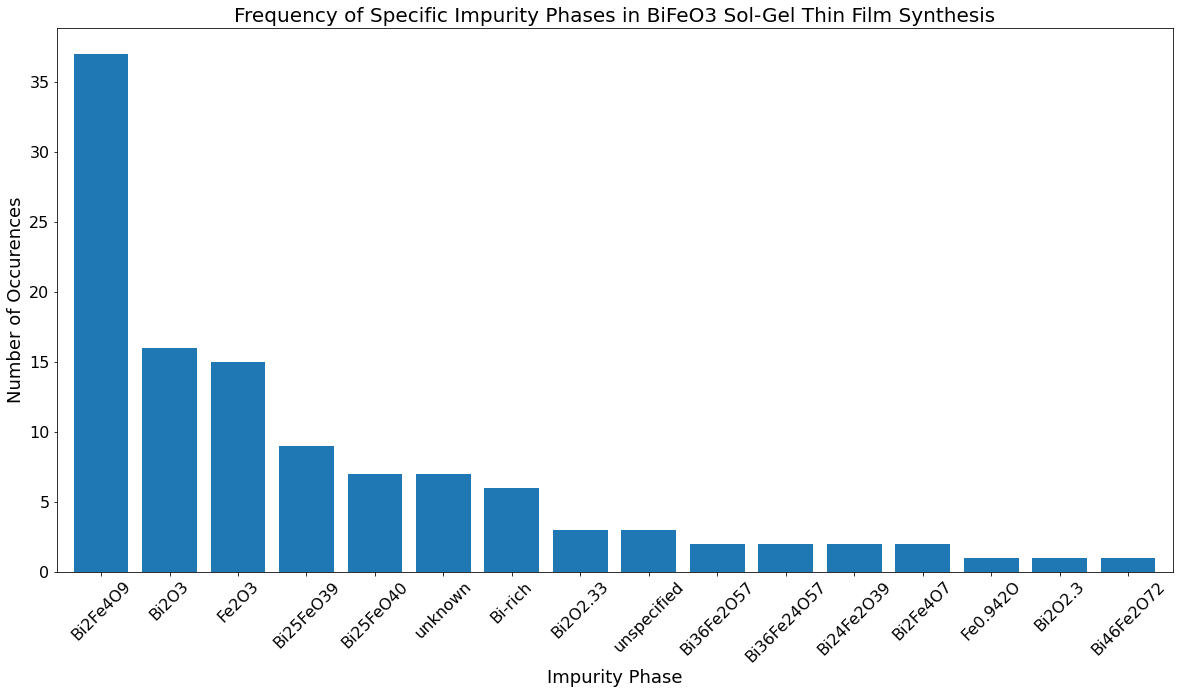

In [83]:
# Histogram of impurity phases

impurities = list(lit_df['reported_impurities'])

impurities_list = []
for rep in impurities:
    if rep != '[]':
        strings = rep[1:-1]
        imps = [imp for imp in strings.split(', ')]
        for imp in imps:
            if imp != "'amorphous'":
                impurities_list.append(imp[1:-1])
                
impurities_series = pd.Series(impurities_list)

impurities_series.replace('unkown', 'unknown', inplace=True)

impurities_series.sort_values(inplace=True)

plt.figure(figsize=(20,10))
impurities_series.value_counts().plot(kind='bar', width=0.8)
plt.title('Frequency of Specific Impurity Phases in BiFeO3 Sol-Gel Thin Film Synthesis', fontsize=20)
plt.xlabel('Impurity Phase', fontsize=18)
plt.ylabel('Number of Occurences', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

In [70]:
# 2-way Venn diagram for solvents

solvents = {
    '2_methoxyethanol' : 0,
    'ethylene_glycol' : 0,
    'both' : 0
}

solvs1 = df['solvent1'].fillna(0)
solvs2 = df['solvent2'].fillna(0)

for solv1, solv2 in zip(solvs1, solvs2):
    if solv1 and solv1 not in solvents.keys():
        solvents[solv1] = 0
    if solv2 and solv2 not in solvents.keys():
        solvents[solv2] = 0
        
    if solv1 and solv2:
        if solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol':
            solvents['both'] += 1
        else:
            solvents[solv1] += 1
            solvents[solv2] += 1
    elif solv1 and not solv2:
        solvents[solv1] += 1
    elif not solv1 and solv2:
        solvents[solv2] += 1

pprint(solvents)

{'2_ethoxyethanol': 5,
 '2_methoxyethanol': 240,
 'acetic_acid': 1,
 'both': 26,
 'ethanol': 3,
 'ethylene_glycol': 57,
 'formamide': 1,
 'nitric_acid': 12,
 'nn_dimethylformamide': 3,
 'polyethylene_glycol': 1,
 'propionic_acid': 2,
 'propylene_glycol': 1,
 'trimethylene_glycol': 1,
 'water': 1}


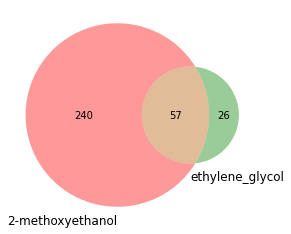

In [25]:
venn2(
    subsets=(
        solvents['2_methoxyethanol'],
        solvents['both'],
        solvents['ethylene_glycol']), 
    set_labels=('2-methoxyethanol', 'ethylene_glycol'))

In [28]:
# 2-way Venn diagram for chelating agents

In [29]:
# 3-way Venn diagram for solvents and acetic acid

In [30]:
# 3-way Venn diagram for solvents and citric acid